#### Main Goal of Project: Prediction, not interpretation
##### looking into features that are more important for the most winningest teams, which is another project idea that I would like to explore, is not that point of thie project. Rather, predicting final season points for teams is the objetive. Thus, there is less focus on model evaluation or colinearity. Instead, it is more important to build a model that predicts number of points (since relative points translate to table position i.e. relativity) well for a team based on their season-to-season data, without considering the 'quality' of the model too much.

In [37]:
import numpy as np
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
import plotly
import sklearn
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [3]:
pd.options.plotting.backend = "plotly"

In [4]:
epldf = pd.read_csv('EPL Standings 2000-2022.csv')

In [5]:
epldf.tail(20)

,Season,Pos,Team,Pld,W,D,L,GF,GA,GD,Pts,Qualification or relegation
420,2021-22,1,Manchester City,38,29,6,3,99,26,73,93,Qualification for the Champions League group s...
421,2021-22,2,Liverpool,38,28,8,2,94,26,68,92,Qualification for the Champions League group s...
422,2021-22,3,Chelsea,38,21,11,6,76,33,43,74,Qualification for the Champions League group s...
423,2021-22,4,Tottenham Hotspur,38,22,5,11,69,40,29,71,Qualification for the Champions League group s...
424,2021-22,5,Arsenal,38,22,3,13,61,48,13,69,Qualification for the Europa League group stag...
425,2021-22,6,Manchester United,38,16,10,12,57,57,0,58,Qualification for the Europa League group stag...
426,2021-22,7,West Ham United,38,16,8,14,60,51,9,56,Qualification for the Europa Conference League...
427,2021-22,8,Leicester City,38,14,10,14,62,59,3,52,Not Applicable
428,2021-22,9,Brighton & Hove Albion,38,12,15,11,42,44,-2,51,Not Applicable
429,2021-22,10,Wolverhampton Wanderers,38,15,6,17,38,43,-5,51,Not Applicable


In [6]:
epldf.shape

(440, 12)

In [7]:
# only keep relevant numeric data
num_epldf= epldf[['Pos','W','D','L','GF','GA','GD','Pts']]

<AxesSubplot:>

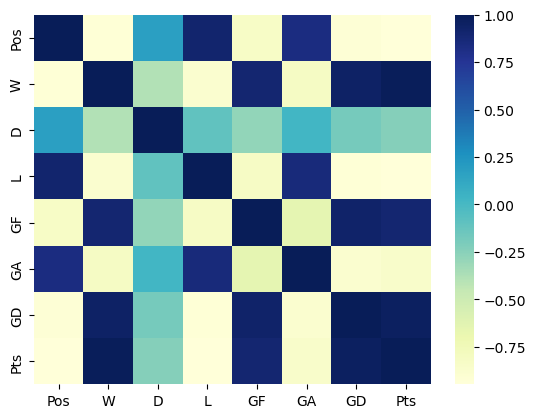

In [8]:
sns.heatmap(num_epldf.corr(),cmap="YlGnBu")

In [9]:
X = epldf[['W','D','L','GF','GA','GD']]
Y = epldf['Pts']

In [10]:
X_train = X.iloc[:420]
y_train = Y.iloc[:420]
X_test = X.iloc[-20:]
y_test = Y.iloc[-20:]


In [11]:
model = xgb.XGBRegressor()

In [12]:
from sklearn.model_selection import GridSearchCV

# set up search grid
param_grid = {"max_depth":    [3,4, 5,6],
              "learning_rate": [0.01, 0.015,0.02]}

# try out every combination of the above values
search = GridSearchCV(model, param_grid, cv=5).fit(X_train, y_train)

print("The best parameters are: ", search.best_params_)

The best parameters are:  {'learning_rate': 0.02, 'max_depth': 3}


In [13]:
model=xgb.XGBRegressor(learning_rate = search.best_params_["learning_rate"],
                           max_depth     = search.best_params_["max_depth"],)

model.fit(X_train, y_train)

predictions = model.predict(X_test)

In [14]:
predictions

array([77.04239 , 76.1504  , 63.72129 , 62.976234, 61.335968, 50.8153  ,
       50.074333, 45.032627, 43.991783, 43.726967, 41.496918, 41.486866,
       40.219643, 38.69451 , 34.270206, 34.454823, 32.411   , 31.32315 ,
       19.110287, 20.745018], dtype=float32)

In [15]:
import plotly.graph_objects as go
# plotly plots not showing on pdf/html output
# go.renderers.default = "plotly_mimetype+notebook"

In [16]:
position = epldf.iloc[:20]['Pos']
points2122 = epldf.iloc[:20]['Pts']

fig = go.Figure()
fig.add_trace(go.Bar(x=position,
                y=predictions,
                name='Predicted',
                marker_color='rgb(55, 83, 109)'
                ))
fig.add_trace(go.Bar(x=position,
                y=points2122,
                name='Actual',
                marker_color='rgb(26, 118, 255)'
                ))
fig.add_trace(go.Bar(x=position,
                y=points2122-predictions,
                name='Residual',
                marker_color='Red'
                ))

fig.update_layout(
    title='Predicted vs Actual Points (2021-2022 season)',
    xaxis=dict(
        title='Position',
        tickfont_size=14,
    ),
    yaxis=dict(
        title='Points',
        titlefont_size=16,
        tickfont_size=14
    ),
    legend=dict(
        x=1.00,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    barmode='group',
    bargap=0.15, # gap between bars of adjacent location coordinates.
    bargroupgap=0.1 # gap between bars of the same location coordinate.
)
fig.show()

In [17]:
mse2122 = mean_squared_error(points2122,predictions)
rmse2122 = np.sqrt(mse2122)
avg_abs_diff = mean_absolute_error(points2122,predictions)
print("The MSE and RMSE are %f and %f.\n Average of aboslute values of the difference: %f" %(mse2122,rmse2122,avg_abs_diff))

The MSE and RMSE are 58.472033 and 7.646701.
 Average of aboslute values of the difference: 7.111054


In [18]:
def metrics(pred,act):
    mse = mean_squared_error(pred,act)
    print("The MSE and RMSE are %f and %f.\n Average of aboslute values of the difference: %f" %(mse,np.sqrt(mse),mean_absolute_error(act,pred)))
    

#### Observations
1. Gap between predicted and actual values increase for lower position teams.
2. Points are quite off overall, yet position is "predicted" quite accurately except for 19th and 20th teams.

In [19]:
# set up new search grid
param_grid = {"max_depth":    [3,4,5,6,7],
              "learning_rate": [0.005,0.01,0.015,0.02,0.03,.1]}

# try out every combination of the above values
search = GridSearchCV(model, param_grid, cv=5).fit(X_train, y_train)

print("The best parameters are: ", search.best_params_)

The best parameters are:  {'learning_rate': 0.1, 'max_depth': 4}


In [20]:
model=xgb.XGBRegressor(learning_rate = search.best_params_["learning_rate"],
                           max_depth     = search.best_params_["max_depth"],)

model.fit(X_train, y_train)

predictions_2 = model.predict(X_test)

metrics(predictions_2,points2122)

The MSE and RMSE are 49.948304 and 7.067411.
 Average of aboslute values of the difference: 4.596758


In [21]:
fig = go.Figure()
fig.add_trace(go.Bar(x=position,
                y=predictions_2,
                name='Predicted',
                marker_color='rgb(55, 83, 109)'
                ))
fig.add_trace(go.Bar(x=position,
                y=points2122,
                name='Actual',
                marker_color='rgb(26, 118, 255)'
                ))
fig.add_trace(go.Bar(x=position,
                y=points2122-predictions_2,
                name='Residual',
                marker_color='Red'
                ))

fig.update_layout(
    title='Predicted vs Actual Points (2021-2022 season)',
    xaxis=dict(
        title='Position',
        tickfont_size=14,
    ),
    yaxis=dict(
        title='Points',
        titlefont_size=16,
        tickfont_size=14
    ),
    legend=dict(
        x=1.00,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    barmode='group',
    bargap=0.15, # gap between bars of adjacent location coordinates.
    bargroupgap=0.1 # gap between bars of the same location coordinate.
)
fig.show()

- This time, we get great results bar the first two predictions and the one second to last.
- Moving on, the challengee here is that we need to predict positions *before* a season starts. These data which result from the teams actually playing games can't be directly used like this.
- Instead, my idea is to evaluate team's performance level (e.g. XG as in Expected Points and XP as in Expected Points) and create a metric that will include strengths and levels of individual players of a team, including the data which we have used for the above two models. This is based on the assumption that most teams have almost identical teams (and especially starting elevens) when going into a new season (we can fact-check this by looking into the data). In the case there are major squad and starting 11 changes, that can very well be factored into our future model.

In [22]:
URL = 'https://projects.fivethirtyeight.com/soccer-api/club/spi_matches.csv'
data = pd.read_csv(URL)

In [31]:
# example data point
data.head()
data.tail()

,season,date,league_id,league,team1,team2,spi1,spi2,prob1,prob2,...,importance1,importance2,score1,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2
67383,2023,2023-10-21,1951,Major League Soccer,San Jose Earthquakes,Austin FC,38.98,46.10,0.4286,0.3230,...,100.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67384,2023,2023-10-21,1951,Major League Soccer,Los Angeles Galaxy,FC Dallas,45.60,43.29,0.5201,0.2328,...,100.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67385,2023,2023-10-21,1951,Major League Soccer,Vancouver Whitecaps,Los Angeles FC,36.25,56.78,0.3041,0.4400,...,100.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67386,2023,2023-10-21,1951,Major League Soccer,Colorado Rapids,Real Salt Lake,35.72,33.50,0.5229,0.2155,...,100.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67387,2023,2023-10-21,1951,Major League Soccer,Sporting Kansas City,Minnesota United FC,40.19,38.01,0.5261,0.2191,...,100.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
data.columns

Index(['season', 'date', 'league_id', 'league', 'team1', 'team2', 'spi1',
       'spi2', 'prob1', 'prob2', 'probtie', 'proj_score1', 'proj_score2',
       'importance1', 'importance2', 'score1', 'score2', 'xg1', 'xg2', 'nsxg1',
       'nsxg2', 'adj_score1', 'adj_score2'],
      dtype='object')

In [59]:
data['txg'] = data['xg1']+data['xg2']

In [49]:
xg1 = data['xg1'].value_counts().sort_values()
xg2 = data['xg2'].value_counts().sort_values()


In [58]:
data['xg1'].value_counts().sort_values().plot(kind = 'bar')

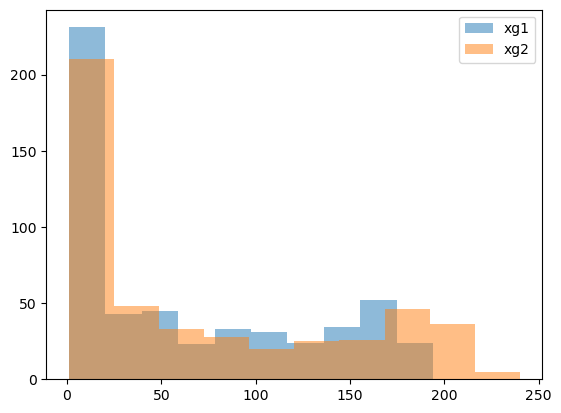

In [53]:
plt.hist(xg1,alpha=0.5,label='xg1')
plt.hist(xg2,alpha=0.5,label='xg2')
plt.legend()
plt.show()

In [62]:
data['league'].unique()

array(["FA Women's Super League", 'French Ligue 1',
       'Barclays Premier League', 'Spanish Primera Division',
       'Italy Serie A', 'German Bundesliga', 'UEFA Champions League',
       'Mexican Primera Division Torneo Clausura', 'Major League Soccer',
       'Swedish Allsvenskan', 'Norwegian Tippeligaen',
       "National Women's Soccer League", 'Brasileiro Série A',
       'Russian Premier Liga', 'Mexican Primera Division Torneo Apertura',
       'Austrian T-Mobile Bundesliga', 'Swiss Raiffeisen Super League',
       'French Ligue 2', 'German 2. Bundesliga',
       'English League Championship', 'Scottish Premiership',
       'Portuguese Liga', 'Dutch Eredivisie',
       'Turkish Turkcell Super Lig', 'Spanish Segunda Division',
       'Italy Serie B', 'Argentina Primera Division',
       'UEFA Europa League', 'United Soccer League', 'Danish SAS-Ligaen',
       'Belgian Jupiler League', 'Japanese J League',
       'Chinese Super League', 'English League One',
       'South Africa

In [93]:
cond = data[data['league'].isin(['Italy Serie A','Spanish Primera Division','German Bundesliga','Barclays Premier League'])]

c:\Users\chk6633\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

31.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

c:\Users\chk6633\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

29.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

c:\Users\chk6633\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

31.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

c:\Users\chk6633\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

19.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



Text(0.5, 1.0, 'Total Xg in a game by League')

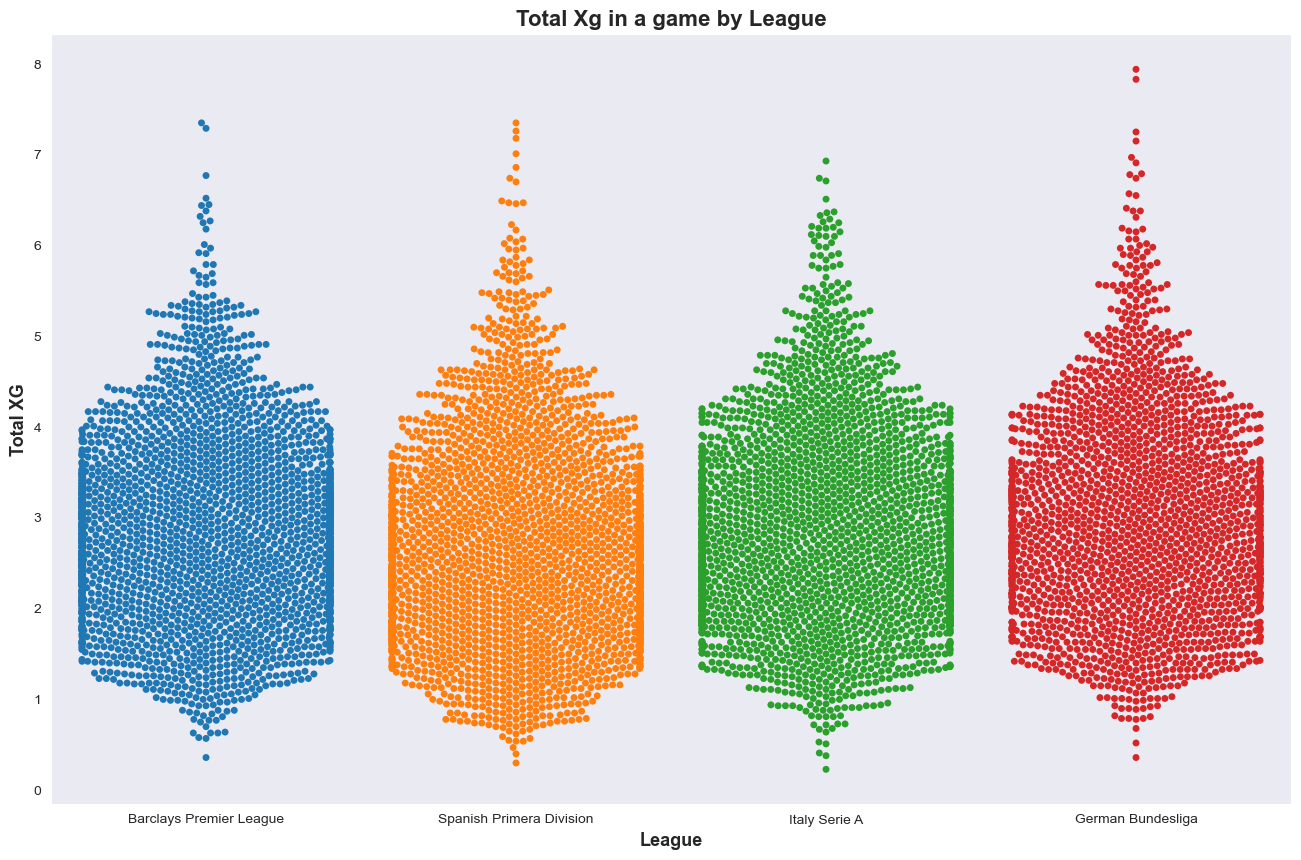

In [94]:
sns.set_style('dark') #set theme
#Create subplot
fig,ax = plt.subplots(figsize=(16,10))
#Plot the swarm
chart5 = sns.swarmplot(x="league", y="txg", data=cond)
#Label
chart5.set_ylabel('Total XG',weight='bold',fontsize=13)
chart5.set_xlabel('League', weight='bold',fontsize=13)
chart5.set_title('Total Xg in a game by League',weight='bold',fontsize=16)

In [ ]:
#All variables are categorical need to encode
from sklearn.preprocessing import LabelEncoder
def encodeCategorical(data):
    labelencoder=LabelEncoder()
    for col in data.columns:
        data[col] = labelencoder.fit_transform(data[col])
    return data
df = encodeCategorical(df)
df.head()


In [ ]:

enc = OrdinalEncoder()
enc.fit(df[["Sex","Blood", "Study"]]) #add your columns that need to be encoded
df[["Sex","Blood", "Study"]] = enc.transform(df[["Sex","Blood", "Study"]])

In [ ]:
# Get indexes where column is part time and intern
indexPartTime = df[df['job_type'] == 'Part-Time'].index
indexIntern = df[df['job_type'] == 'Intern'].index
 
# Delete these row indexes from dataFrame
df.drop(indexPartTime, inplace=True)
df.drop(indexIntern, inplace=True)

In [ ]:

df = df.drop(['ColumnName'], axis = 1)

In [ ]:
train.isnull().sum(axis=0)